In [28]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


* Split train and test
* CV on 5-fold
* grid search parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}


In [29]:
df = pd.read_csv('../data/Default.csv')

df['default_fact'] = df.default.factorize()[0]
df['student_fact'] = df.student.factorize()[0]

X = df[['balance', 'income', 'student_fact']]
y = df.default_fact

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=88)

lr = LogisticRegression()

parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}

clf = GridSearchCV(lr, parameters, cv = 5)

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_


/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/sklearn/utils/optimize.py:200: UserWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/scipy/opti

In [30]:
best_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
clf.grid_scores_
clf.best_params_
clf.best_score_

0.97299999999999998

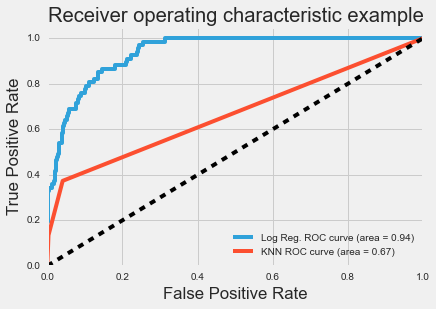

In [43]:
from sklearn.metrics import roc_curve, auc
y_hat_proba = best_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

roc_auc = auc(fpr, tpr)

# KNN
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv = 5)
knn_clf.fit(X_train, y_train)
knn_y_hat = knn_clf.predict_proba(X_test)

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_hat[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)


plt.figure()
plt.plot(fpr, tpr, label='Log Reg. ROC curve (area = %0.2f)' % roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()









In [18]:
y_hat = best_clf.predict(X_test)

print(confusion_matrix(y_test, y_hat) )


[[1929    4]
 [  48   19]]


In [21]:
accuracy_score(y_test, y_hat)

0.97399999999999998

In [24]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10] }

clf = GridSearchCV(knn, parameters, cv = 5)

clf.fit(X_train, y_train)
clf.grid_scores_

y_hat = clf.predict(X_test)

print(confusion_matrix(y_test, y_hat) )
accuracy_score(y_test, y_hat)

[[1927    6]
 [  58    9]]


0.96799999999999997